In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("./data_paper/Force15kgf.csv")
data.head()

Unnamed: 0  Cycle    max.    min.  max.-min.     CIV   CCVIS  CCVES  \
0           0      1  1357.5  1283.5   72.82119  2.4414  11.036  1.680   
1           1      2  1357.7  1285.9   72.41452  2.7008  11.118  1.590   
2           2      3  1357.7  1286.0   72.05853  2.7048  11.090  1.680   
3           3      4  1357.8  1286.5   71.75321  2.7065  11.042  1.636   
4           4      5  1357.9  1286.7   71.49856  2.7071  11.020  1.624   

   CVIS (dt)  CVES (dt)     DIV  DVSOC50      SOH  
0    0.01614   0.000072  2.5081   3.2522  1.00000  
1    0.02041   0.000160  2.5014   3.2517  1.00134  
2    0.02021   0.000129  2.5023   3.2520  1.00188  
3    0.01887   0.000146  2.5049   3.2520  1.00215  
4    0.01857   0.000180  2.5057   3.2519  1.00202

In [3]:
print(data['Cycle'].max())

558


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
def bisquare(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**2)**2)
        else:
            res.append(0)
    return np.array(res)

def tricube(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**3)**3)
        else:
            res.append(0)
    return np.array(res)

def get_n_th_distance(x,y,n):
    y=np.array(y)
    distance=abs(y-x)
    distance=np.sort(distance)
    return distance[n-1]


In [6]:
x=np.array([9,8,7,40,100,4,1000,2])
print(x)
l=np.partition(x,3)
print(l)
k=np.partition(x,3)[3]
print(k)
# 무조건 (array, 몇개의 작은 수 뽑을 건지) 지정하고 뽑은 작은 수를 왼쪽에 무작위로
# 배열한 다음 [] 안의 숫자는 그 배열에서 []의 위치의 숫자를 반환
# 0 base라서 [3]은 네번째 숫자이다

t=np.where(x<3)[0]
print(t)

[   9    8    7   40  100    4 1000    2]
[   2    4    7    8    9  100 1000   40]
8
[7]


In [7]:
import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)
    
    


NameError: name 'y' is not defined

In [17]:
t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    


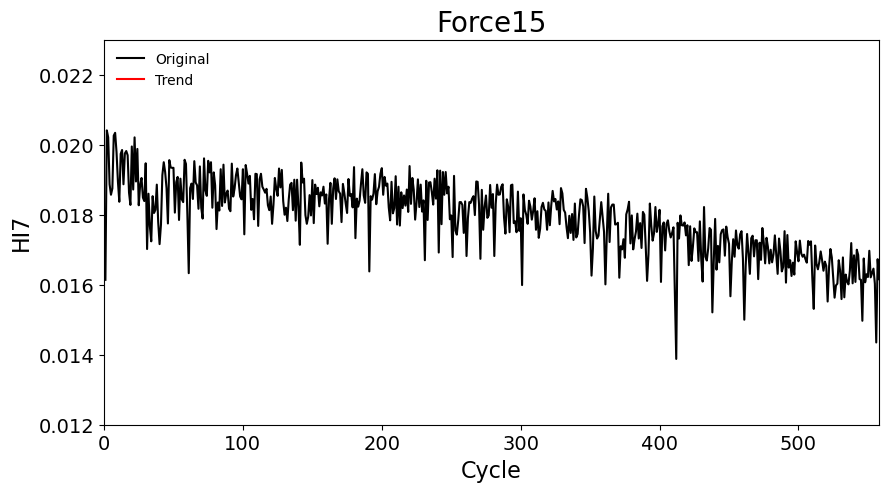

In [18]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CVIS (dt)']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(0.012,0.023,0.001)
plt.show()




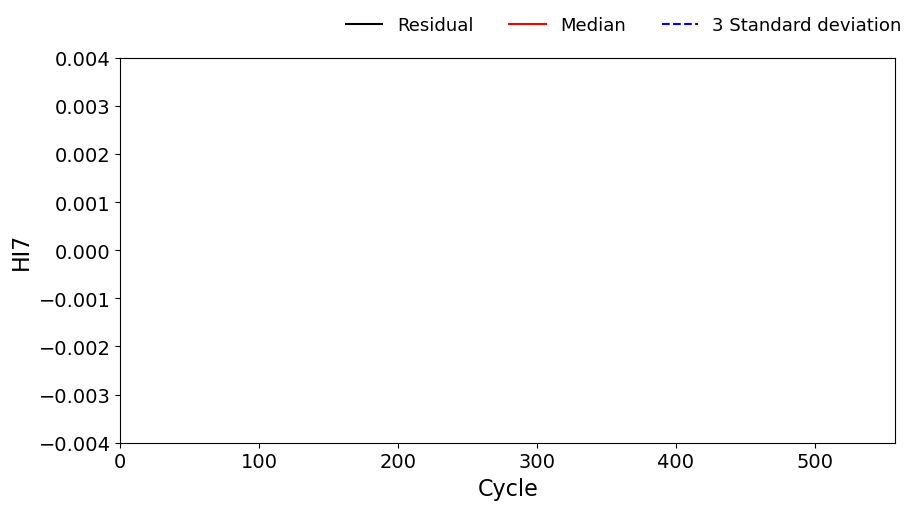

In [19]:
x= data['Cycle']
y_origin= data['CVIS (dt)']
y_trend= fitted_value

y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(-0.004,0.004,0.002)
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()





In [20]:
median=np.median(y_res)
std=np.std(y_res)
print(median)
print(std)
print(y_res.shape)
y_origin_sel=data.loc[data['Cycle']==3,'max.'].iloc[0]
print(y_origin_sel)
data_res=list(zip(x,y_res))
x_values = [y_res for x, y_res in data_res if x == 1]
# x에 대응하는 y_res를 출력해라. 이때 y_res는 data_res에서 x==1일때이다. 
print(x_values)
# 1부터 시작
print(len(y_res))

-2.504494540618914
0.012764515890027934
(558,)
1357.7
[-2.4875972283868717]
558


In [21]:
denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-3)*std<=t<=3*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'CVIS (dt)'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'CVIS (dt)'].iloc[0]
        else :
            denoised_num=closer_number(median,cycle)
            denoised_val=data.loc[data['Cycle']==denoised_num,'CVIS (dt)'].iloc[0]
    denoised.append(denoised_val)
    cycle +=1

y_denoised=np.array(denoised)


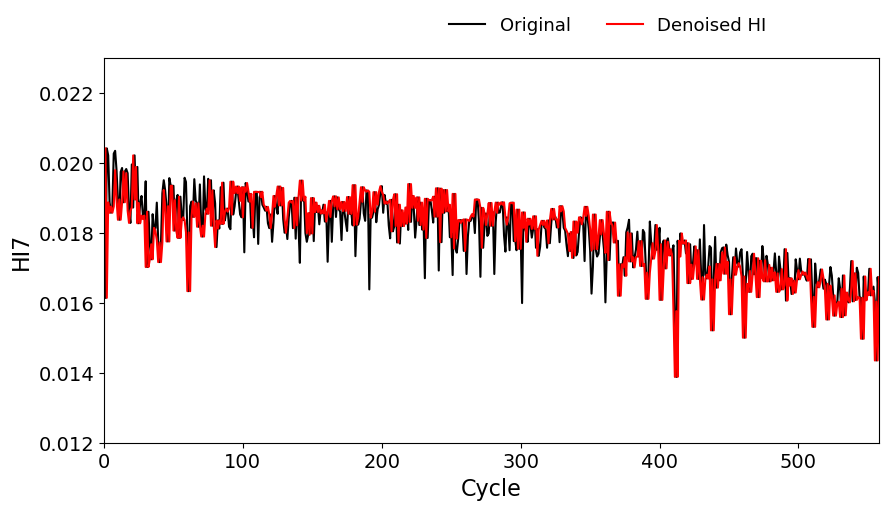

In [22]:

plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(0.012,0.023)

plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()



In [23]:
n=np.median([6,7])
print(n)

6.5


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            WLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:50:35   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1095.9958     61.454     17.835      0.0

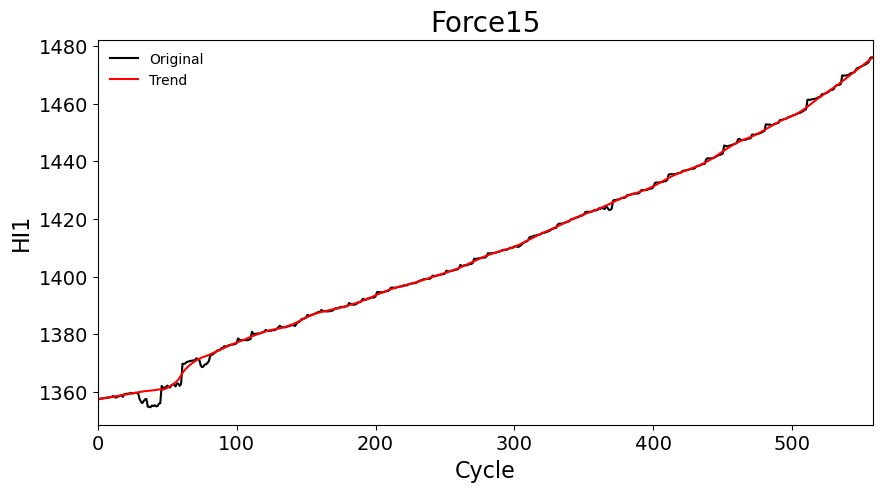

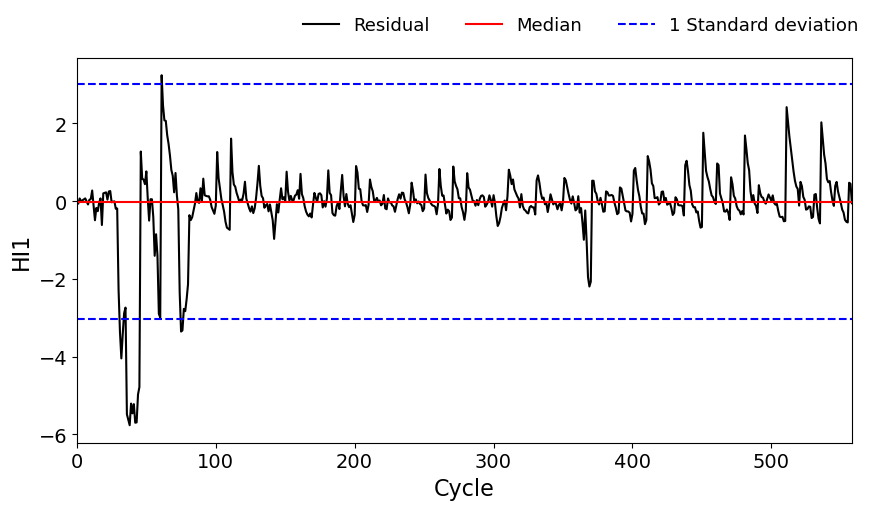

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
56
58
59
60
61
62
63
64
65
66
67
74
75
76
77
78
79
80
101
111
367
368
369
370
411
412
439
451
452
481
482
511
512
513
514
515
536
537
538


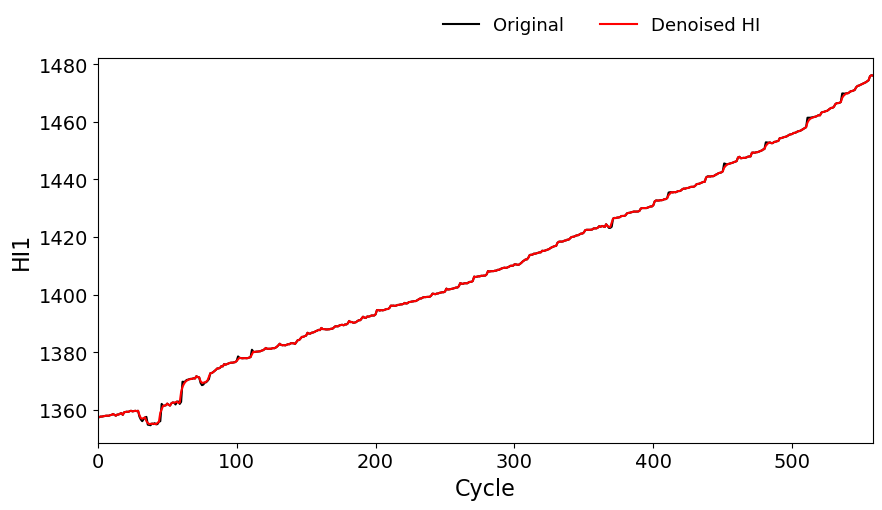

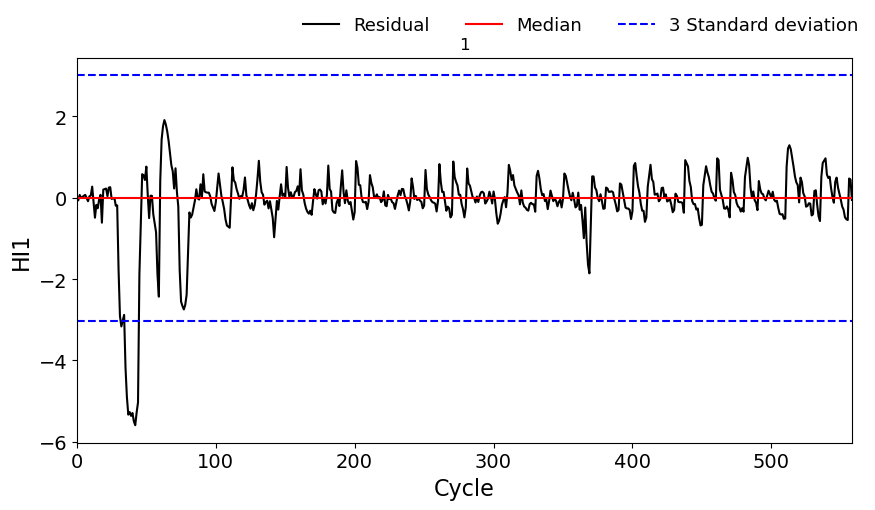

outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
58
59
61
62
63
64
65
66
67
74
75
76
77
78
79
80
367
368
369
512
513
514
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
58
61
62
63
64
65
66
67
74
75
76
77
78
79
80
368
369
512
513
514
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
67
74
75
76
77
78
79
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
75
76
77
78
79
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
75
76
77
78
79
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
75
76
77
78
79
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
75
76
77
78
79
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
75
76
77
78
79
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
75
76
77
78
79
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
62
63
64
65
66
75
76
77
78
79
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
63
64
65
66
75
76
77
7

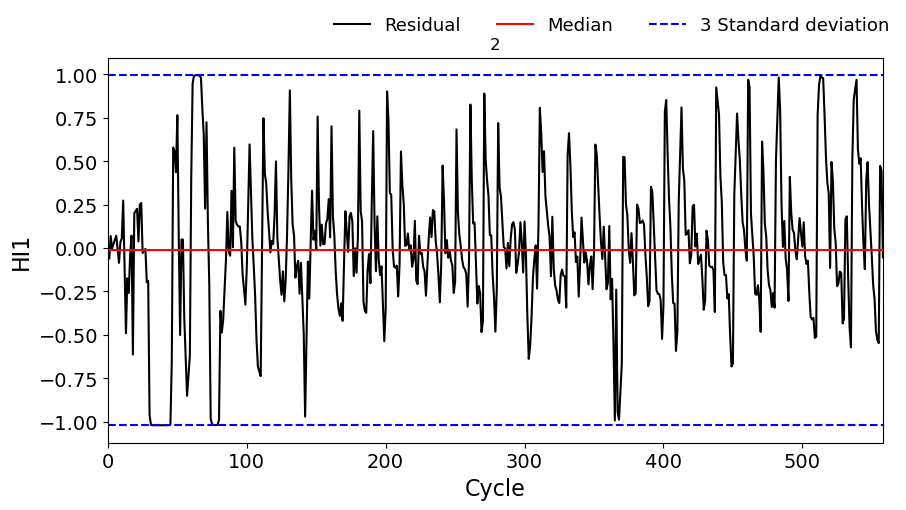

outlier
31
outlier
32
outlier
33
outlier
34
outlier
35
outlier
36
outlier
37
outlier
38
outlier
39
outlier
40
outlier
41
outlier
42
outlier
43
outlier
44
outlier
45
outlier
75
outlier
76
outlier
77
outlier
78
outlier
79


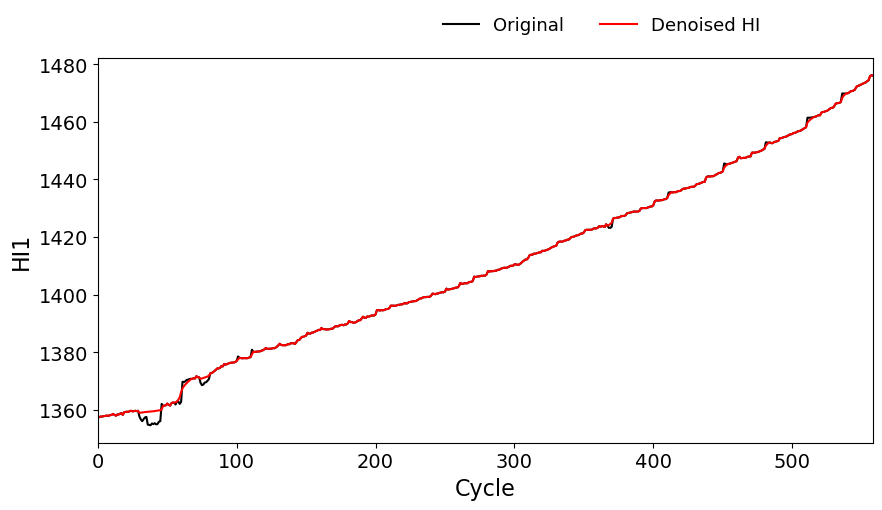

In [92]:
##############################################################
##############################################################

x= data['Cycle']
y= data['max.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised



for t in y_res:
    #t=y_res[cycle-1]
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.'].iloc[0]
    else :
        print(cycle)
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'max.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'max.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_max=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_max,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_max-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.title('1')
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_max-y_trend
for t in y_res_2:
    if t>(3*std) or t<-(3*std):
        print("outlier")
    else:
        pass


######################################################


# 초기 조건 설정
y_denoised_current = y_denoised_max # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_max=y_denoised_current

In [94]:
print(std)
print(y_denoised_current[35]-y_trend[35])

print(y_denoised_current[36]-y_trend[36])

print(y_denoised_current[37]-y_trend[37])
a=y_denoised_current[35]-y_trend[35]
b=y_denoised_current[37]-y_trend[37]
print(np.median([a,b]))


1.0087122218689213
-1.021229684115724
-1.021229684115724
-1.021229684115724
-1.021229684115724


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.394e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:58:22   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1054.9563     39.748     26.541      0.0

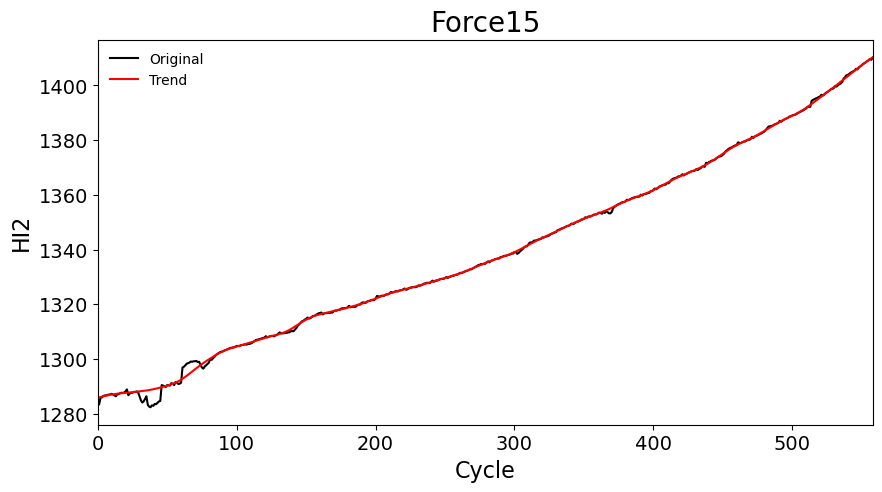

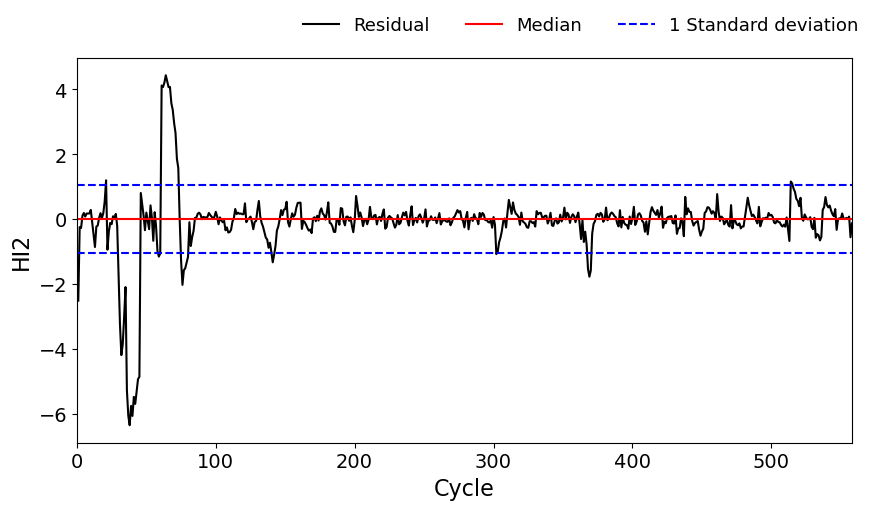

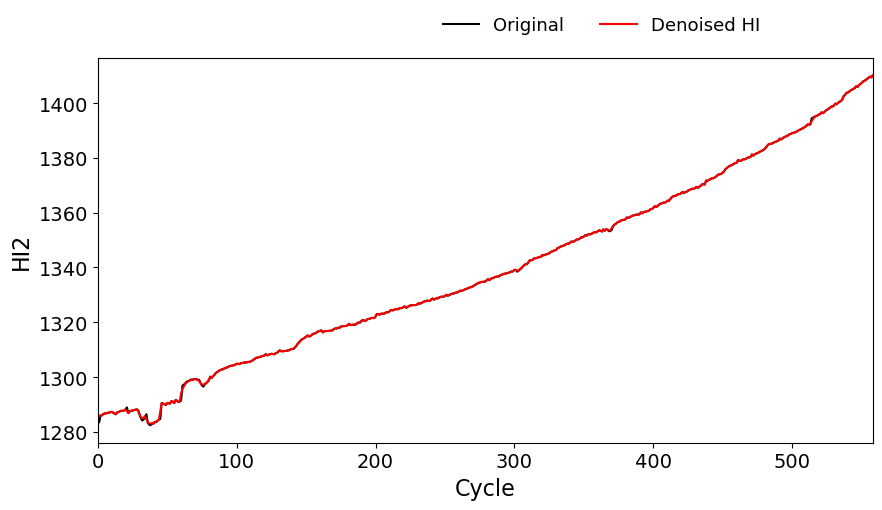

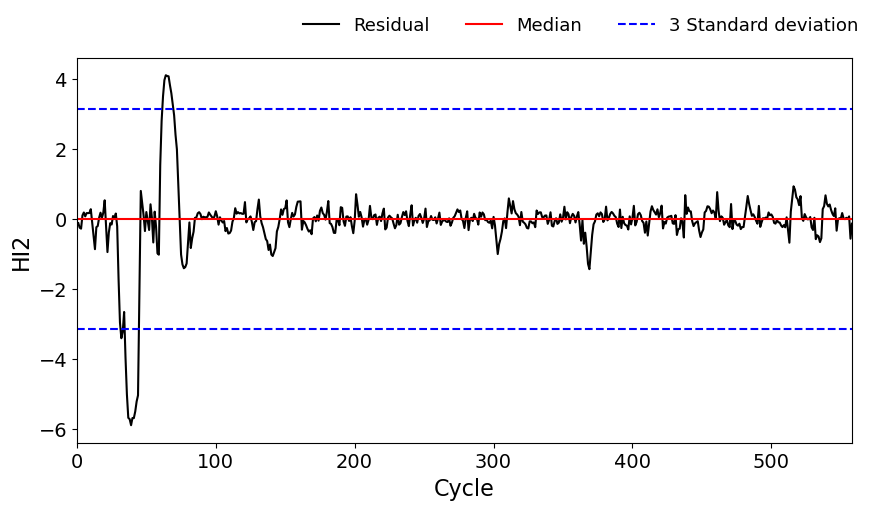

outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
60
61
62
63
64
65
66
67
68
69
70
71
72
76
77
78
79
141
368
369
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
61
62
63
64
65
66
67
68
69
70
71
72
76
77
78
368
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
61
62
63
64
65
66
67
68
69
70
71
72
76
77
78
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
61
62
63
64
65
66
67
68
69
70
71
72
76
77
31
32
33
34
35
36
37
38
39
40
41
42
43
44
61
62
63
64
65
66
67
68
69
70
71
72
76
77
31
32
33
34
35
36
37
38
39
40
41
42
43
44
61
62
63
64
65
66
67
68
69
70
71
72
31
32
33
34
35
36
37
38
39
40
41
42
43
44
61
62
63
64
65
66
67
68
69
70
71
72
31
32
33
34
35
36
37
38
39
40
41
42
43
44
61
62
63
64
65
66
67
68
69
70
71
72
31
32
33
34
35
36
37
38
39
40
41
42
43
44
61
62
63
64
65
66
67
68
69
70
71
72
31
32
33
34
35
36
37
38
39
40
41
42
43
44
61
62
63
64
65

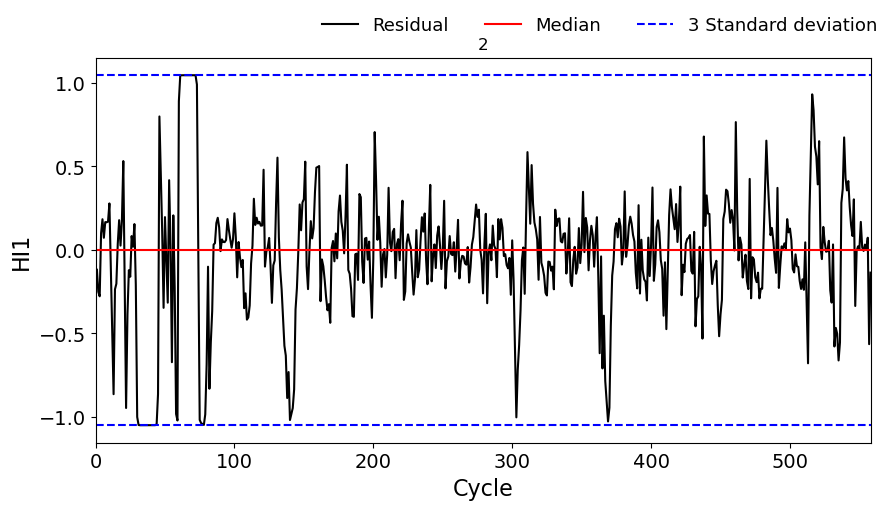

outlier
31
outlier
32
outlier
33
outlier
34
outlier
35
outlier
36
outlier
37
outlier
38
outlier
39
outlier
40
outlier
41
outlier
42
outlier
43
outlier
78


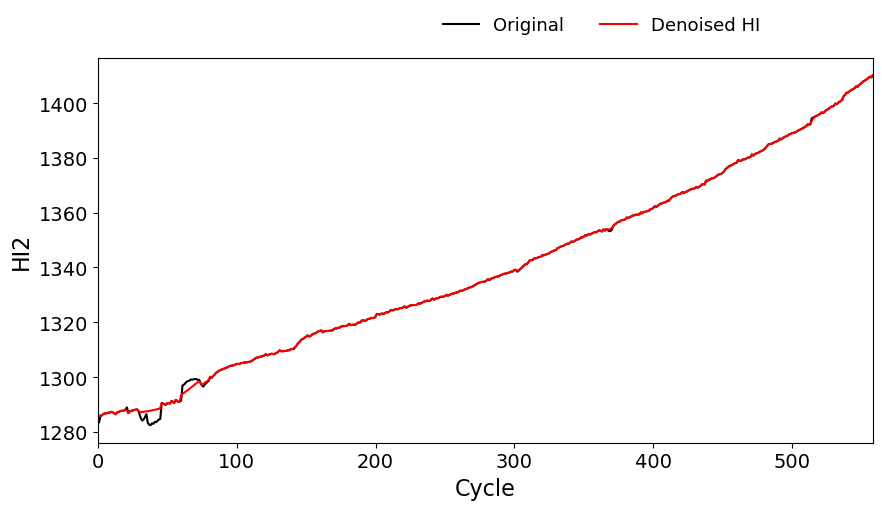

In [97]:
x= data['Cycle']
y= data['min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'min.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'min.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_min=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_min,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_min-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_min-y_trend
for t in y_res_2:
    if t>(3*std) or t<-(3*std):
        print("outlier")
    else:
        pass

#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_min # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_min=y_denoised_current

(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            WLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     397.1
Date:                Fri, 15 Mar 2024   Prob (F-statistic):          8.90e-108
Time:                        14:00:03   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4760     31.313     -0.271      0.7

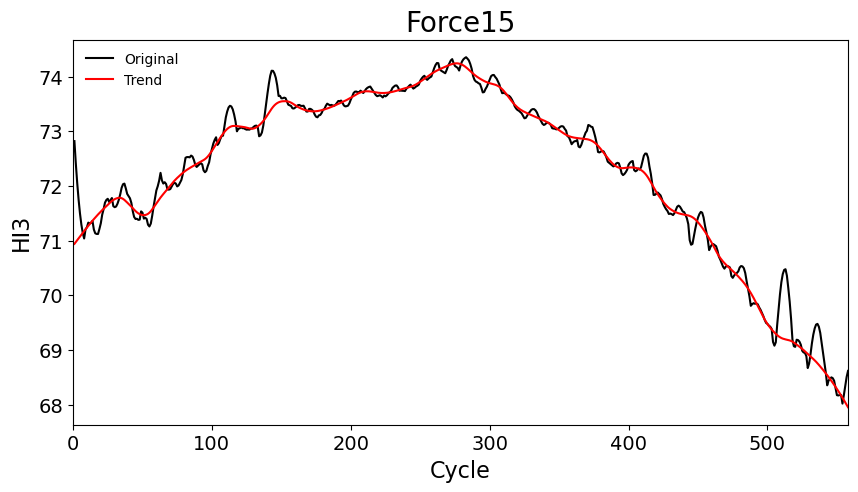

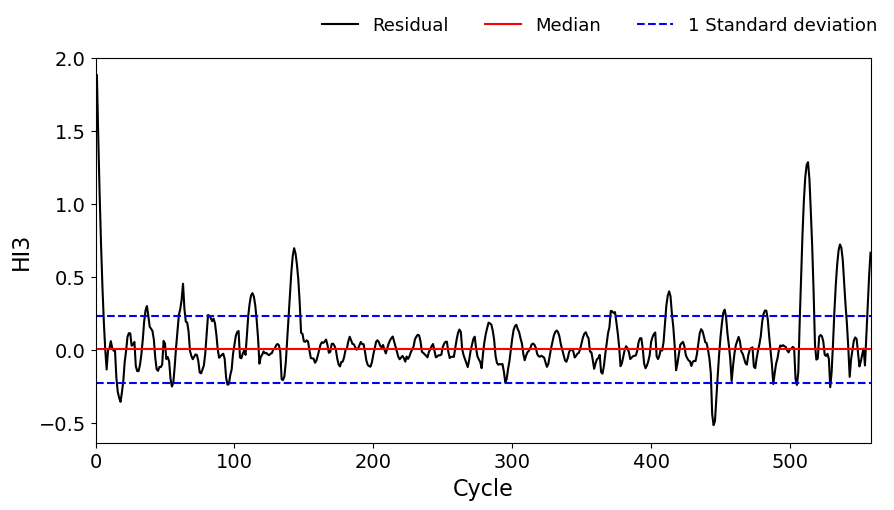

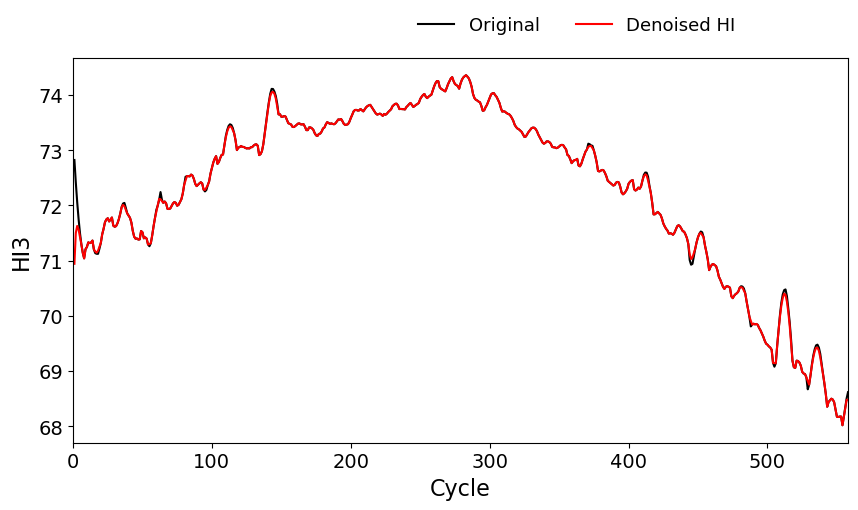

2
3
4
5
16
17
18
19
36
37
61
62
63
64
111
112
113
114
115
139
140
141
142
143
144
145
146
147
373
411
412
413
414
444
445
446
447
482
508
509
510
511
512
513
514
515
516
517
532
533
534
535
536
537
538
539
540
556
557
558
2
3
4
5
16
17
18
19
61
62
63
64
111
112
113
114
115
140
141
142
143
144
145
146
147
411
412
413
414
444
445
446
447
508
509
510
511
512
513
514
515
516
517
533
534
535
536
537
538
539
540
556
557
558
3
4
5
16
17
18
19
61
62
63
111
112
113
114
115
140
141
142
143
144
145
146
147
411
412
413
414
444
445
446
508
509
510
511
512
513
514
515
516
517
533
534
535
536
537
538
539
540
556
557
558
3
4
17
18
61
62
111
112
113
114
140
141
142
143
144
145
146
412
413
414
445
508
509
510
511
512
513
514
515
516
517
533
534
535
536
537
538
539
540
557
558
111
112
113
114
140
141
142
143
144
145
146
412
413
508
509
510
511
512
513
514
515
516
517
533
534
535
536
537
538
539
540
557
558
111
112
113
114
140
141
142
143
144
145
146
508
509
510
511
512
513
514
515
516
533
534
535
536
537

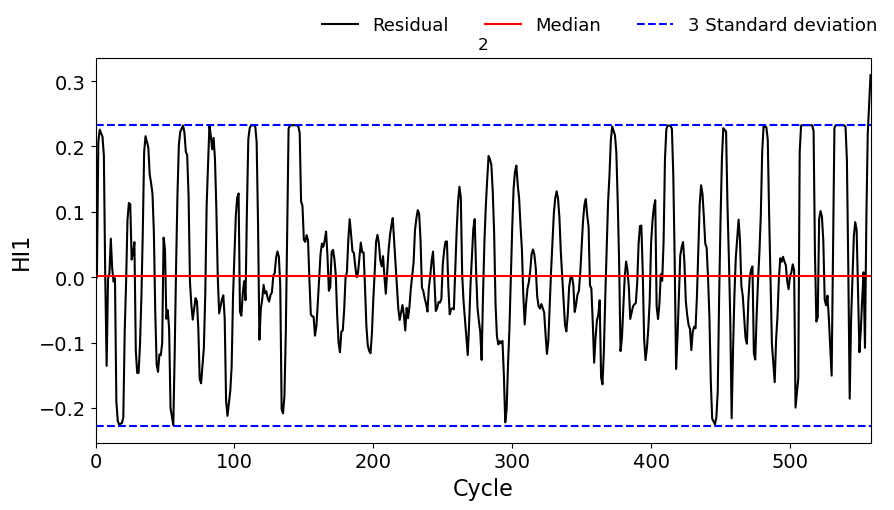

outlier
63
outlier
82
outlier
112
outlier
113
outlier
114
outlier
115
outlier
140
outlier
141
outlier
142
outlier
143
outlier
144
outlier
145
outlier
146
outlier
372
outlier
412
outlier
413
outlier
414
outlier
481
outlier
508
outlier
509
outlier
510
outlier
511
outlier
512
outlier
513
outlier
514
outlier
515
outlier
516
outlier
533
outlier
534
outlier
535
outlier
536
outlier
537
outlier
538
outlier
539
outlier
557
outlier
558


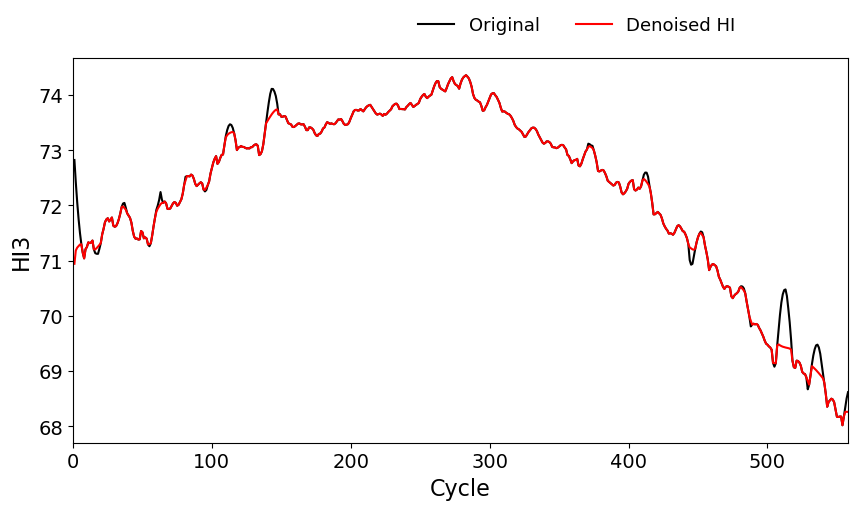

In [98]:
x= data['Cycle']
y= data['max.-min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.-min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised
for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.-min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
           
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_maxmin=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_maxmin,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_maxmin # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_maxmin=y_denoised_current

(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            WLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     81.02
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           1.35e-31
Time:                        14:01:43   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7813      2.464      4.781      0.0

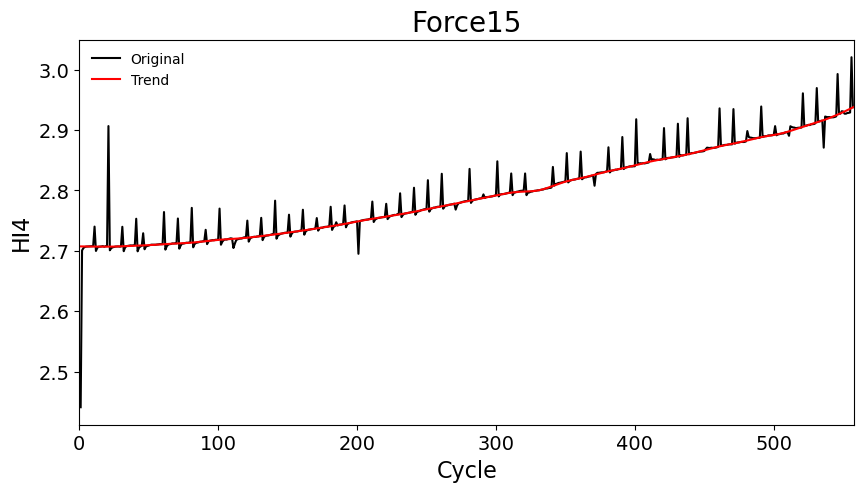

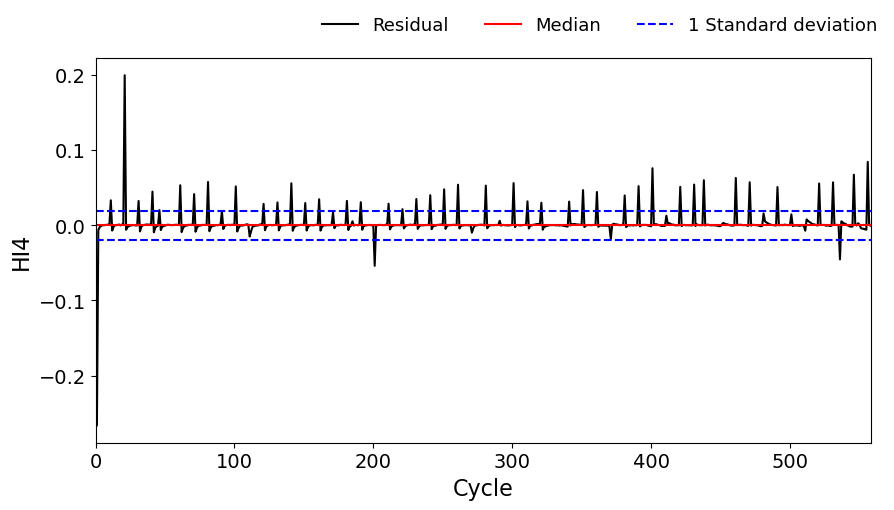

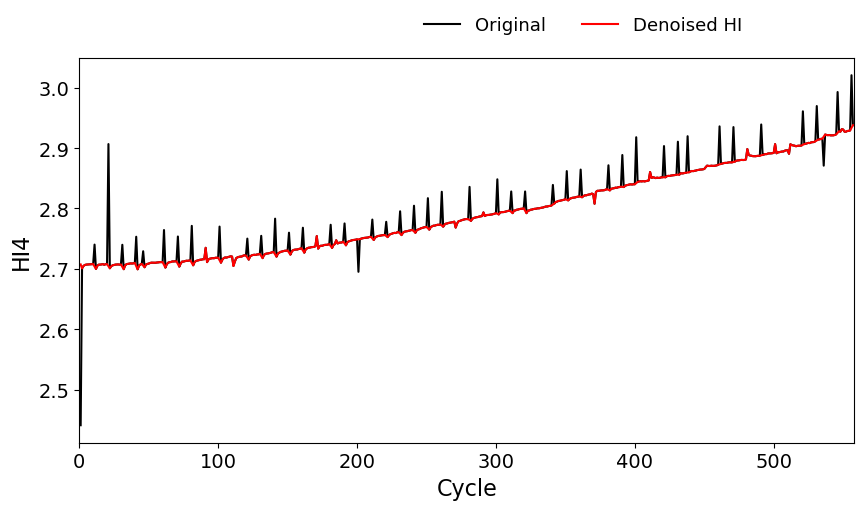

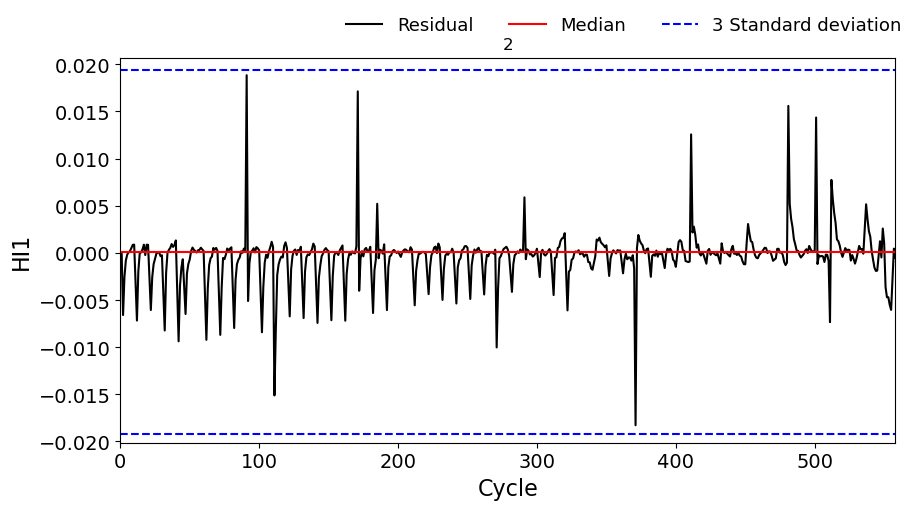

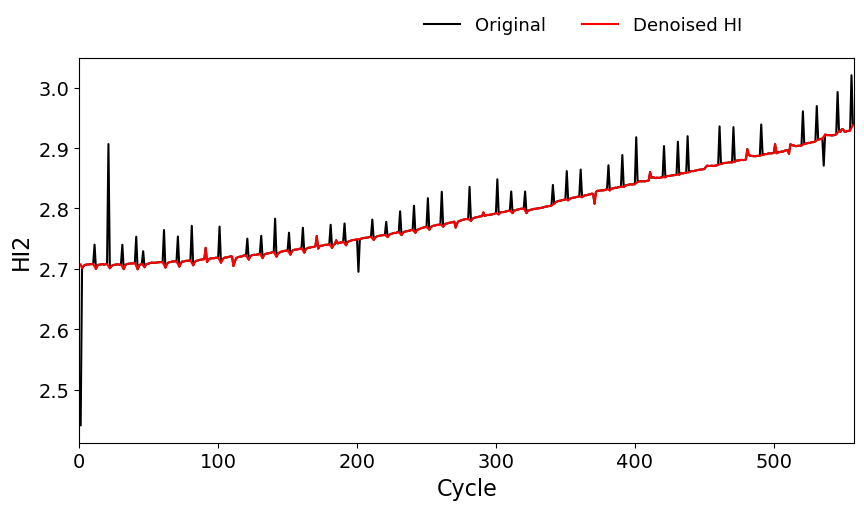

In [99]:
x= data['Cycle']
y= data['CIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_civ=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_civ,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_civ # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_civ=y_denoised_current

(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            WLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           5.32e-47
Time:                        14:04:05   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1135      4.076      2.727      0.0

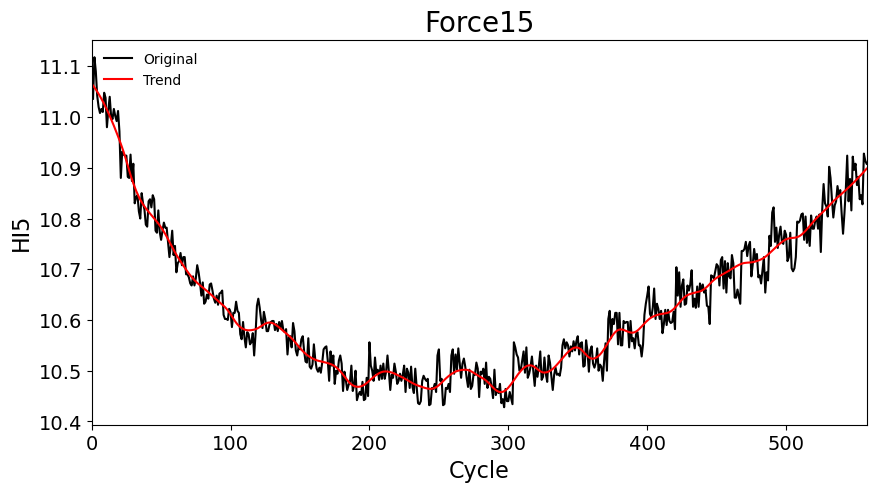

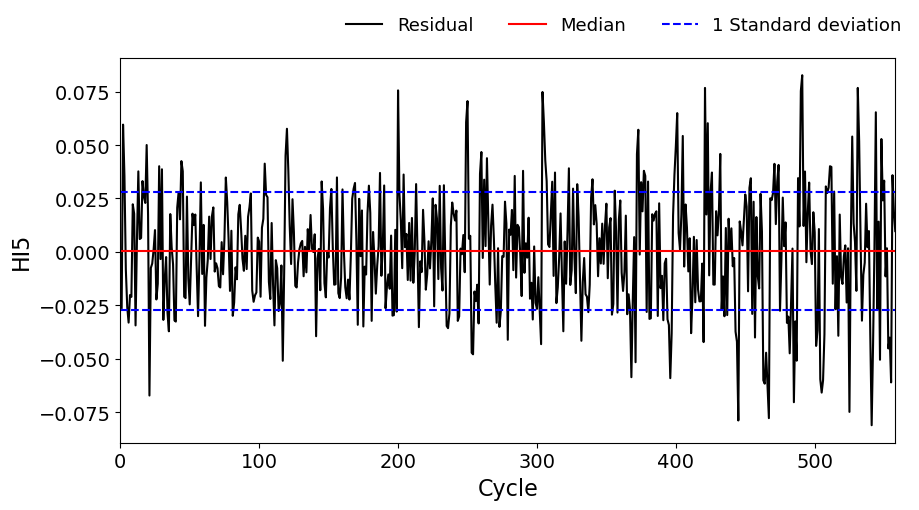

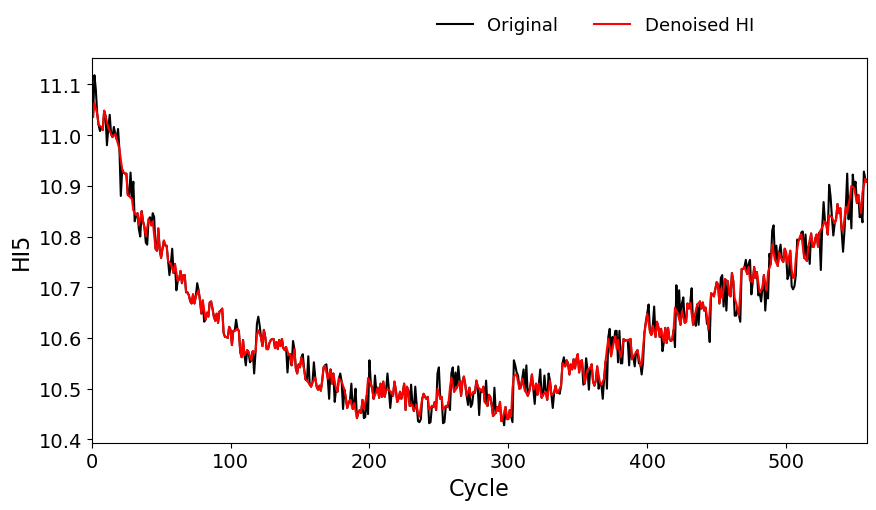

120
168
199
200
249
259
302
304
305
306
372
395
396
399
400
401
420
444
464
465
466
481
486
490
491
504
505
506
510
511
540
541
547
548
554
304
305
306
395
399
400
464
465
466
505
510
304
305
464
465
466
464
465
464


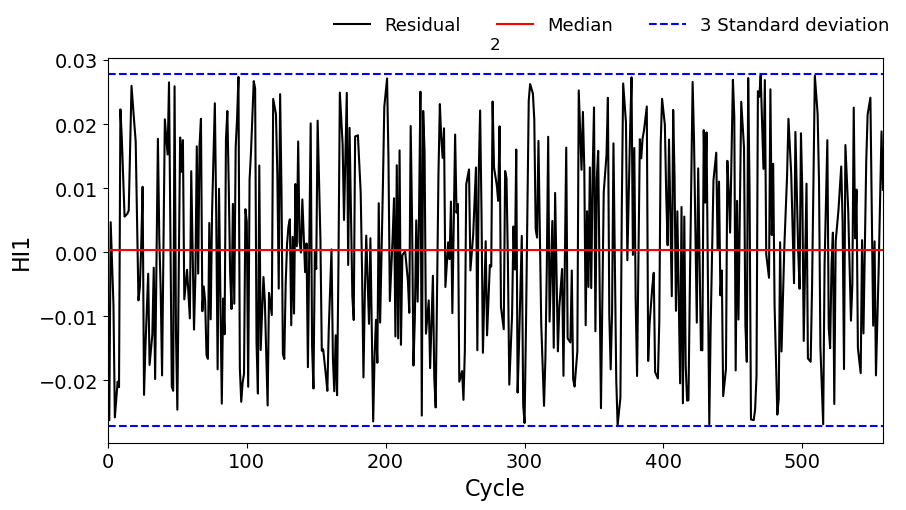

outlier
470
outlier
509


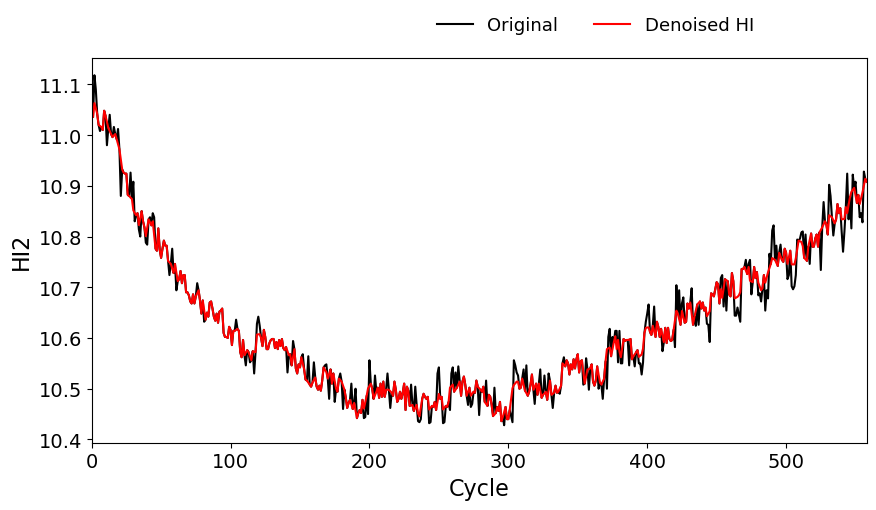

In [100]:
x= data['Cycle']
y= data['CCVIS']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVIS']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVIS'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_CCVIS # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_CCVIS=y_denoised_current

(558,)
(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.977
Date:                Fri, 15 Mar 2024   Prob (F-statistic):             0.0193
Time:                        14:06:01   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0599      3.835      1.319      0.1

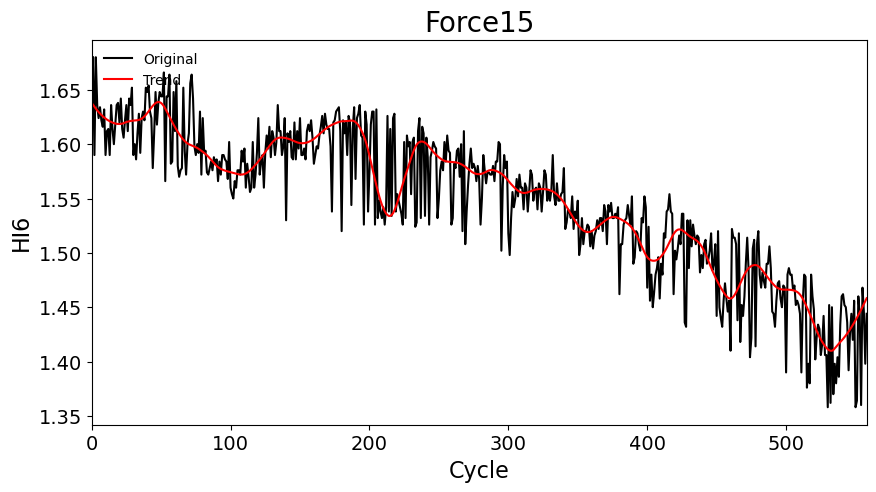

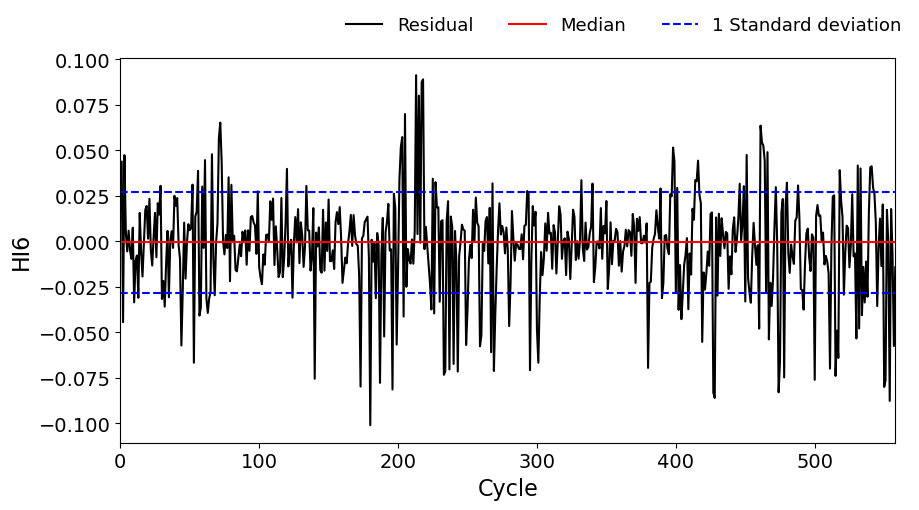

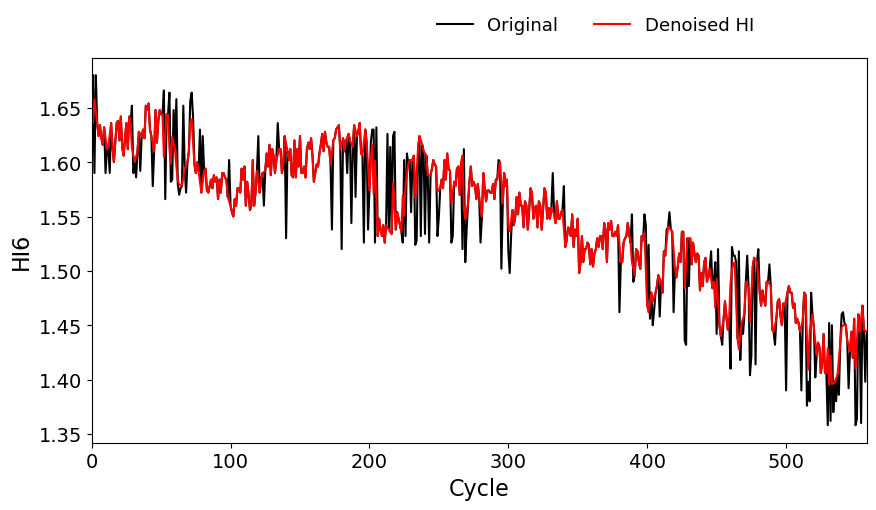

52
62
63
64
71
72
202
204
217
233
269
398
401
415
416
427
460
461
462
463
466
467
474
516
540
541
542
461
462
466
461
462


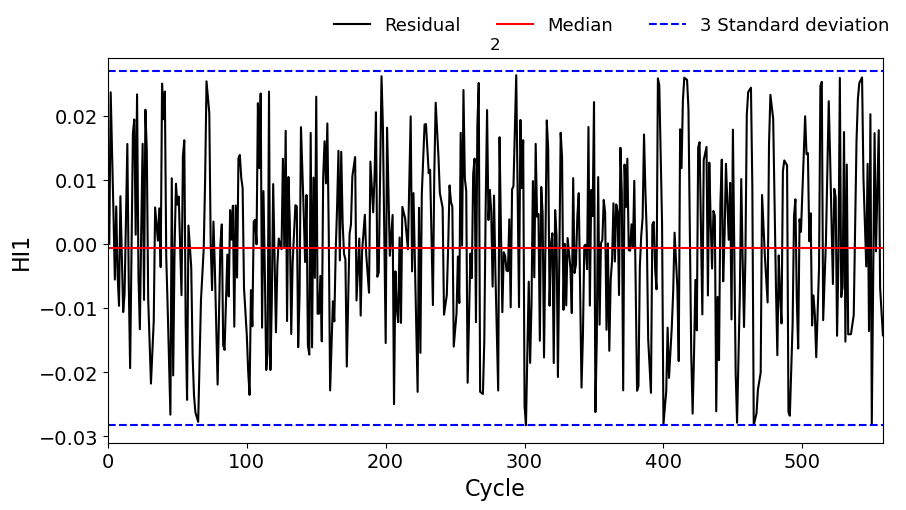

outlier
65
outlier
301
outlier
400
outlier
453
outlier
465
outlier
550


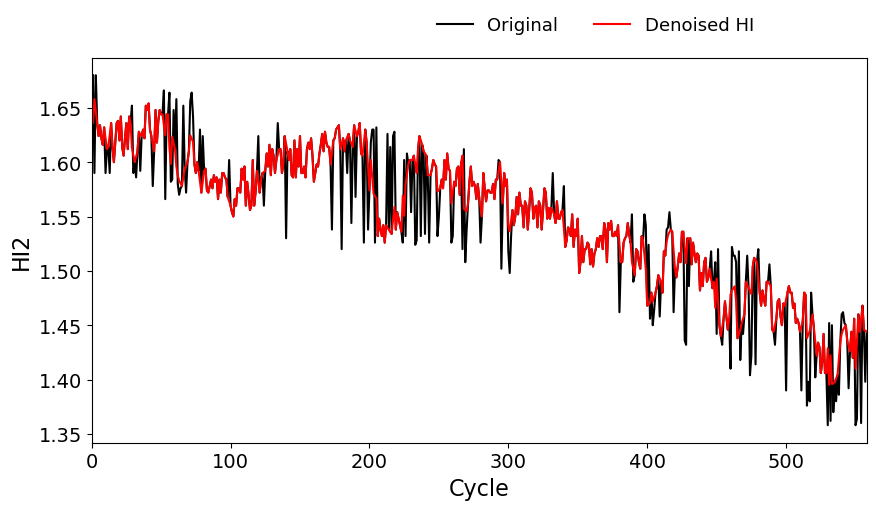

In [101]:
x= data['Cycle']
y= data['CCVES']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVES']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVES'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_CCVES # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_CCVES=y_denoised_current

(558,)
(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            WLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     8.191
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           0.000312
Time:                        14:07:22   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1481      0.063     -2.355      0.0

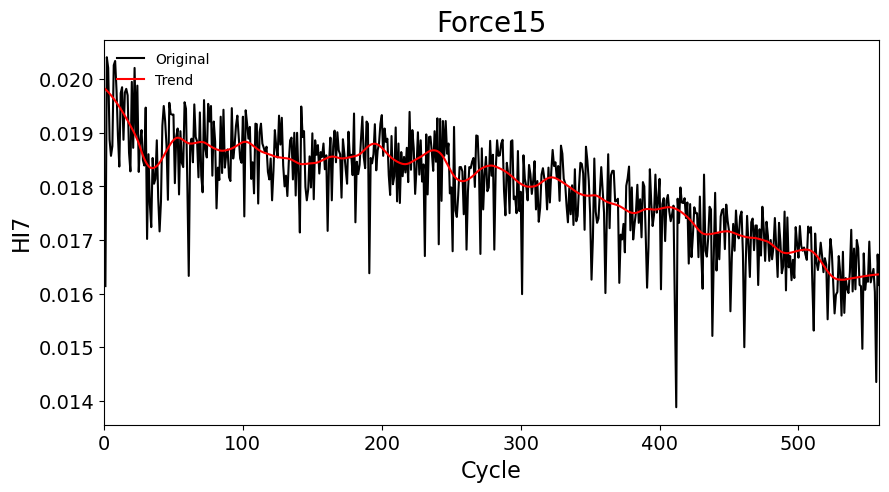

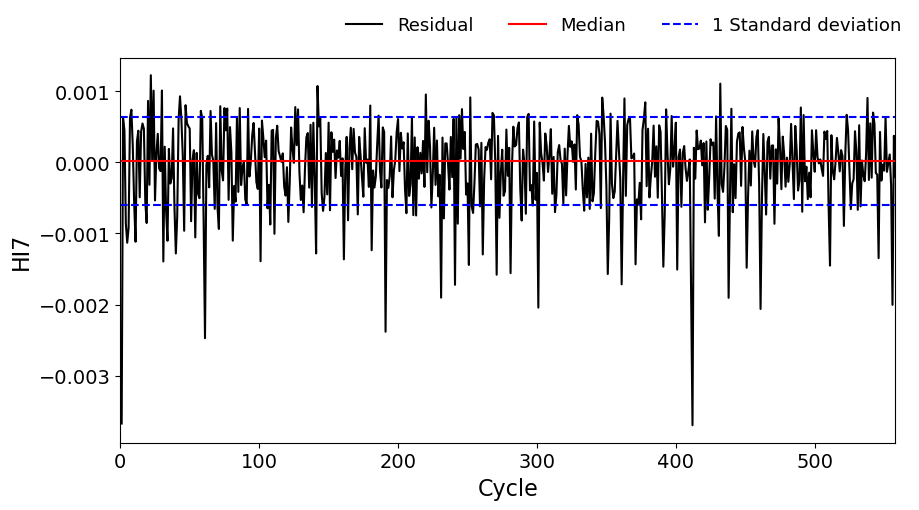

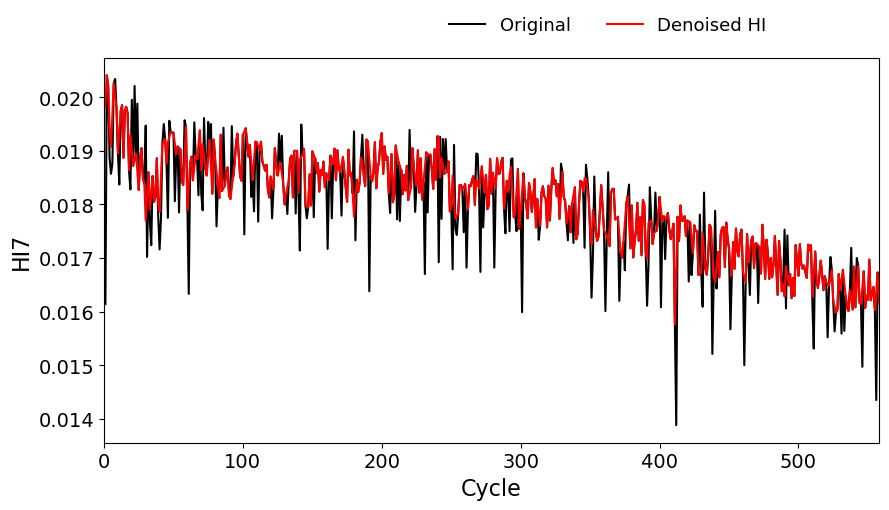

5
30
60
180
346
347
411
412


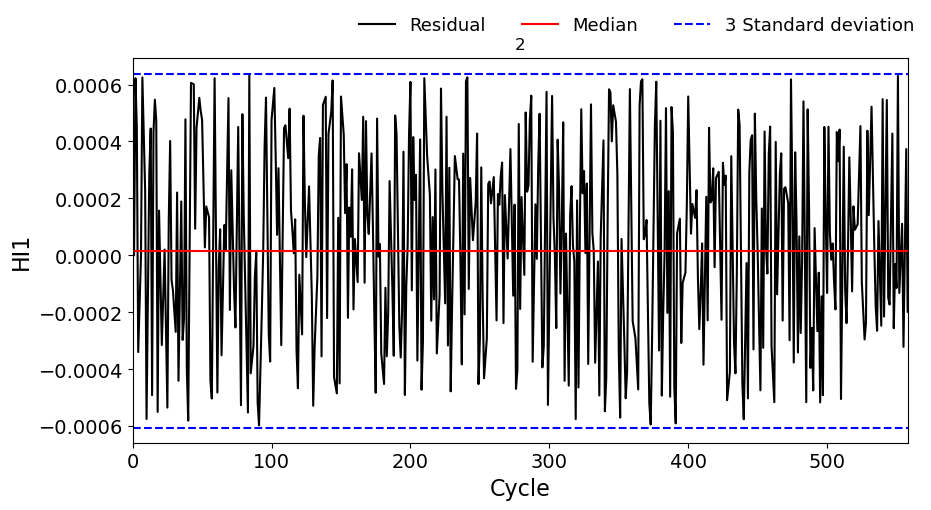

outlier
2
outlier
7
outlier
59
outlier
84
outlier
210
outlier
241
outlier
551


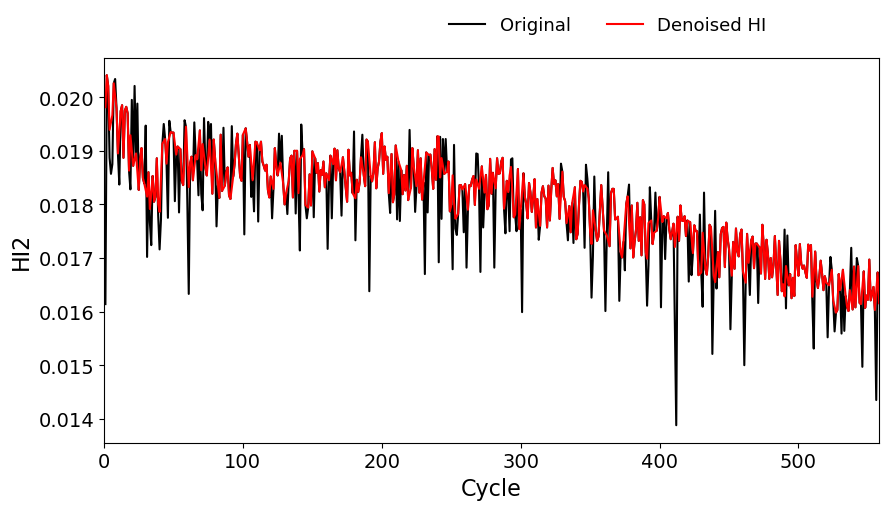

In [102]:
x= data['Cycle']
y= data.iloc[0:,8]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,8]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_CVIS # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_CVIS=y_denoised_current

(558,)
(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            WLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     17.74
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           3.40e-08
Time:                        14:08:29   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.004      2.315      0.0

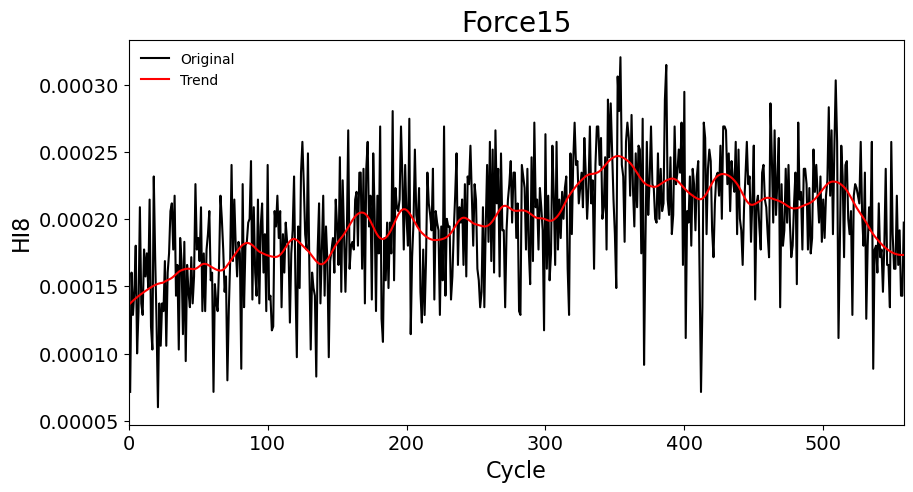

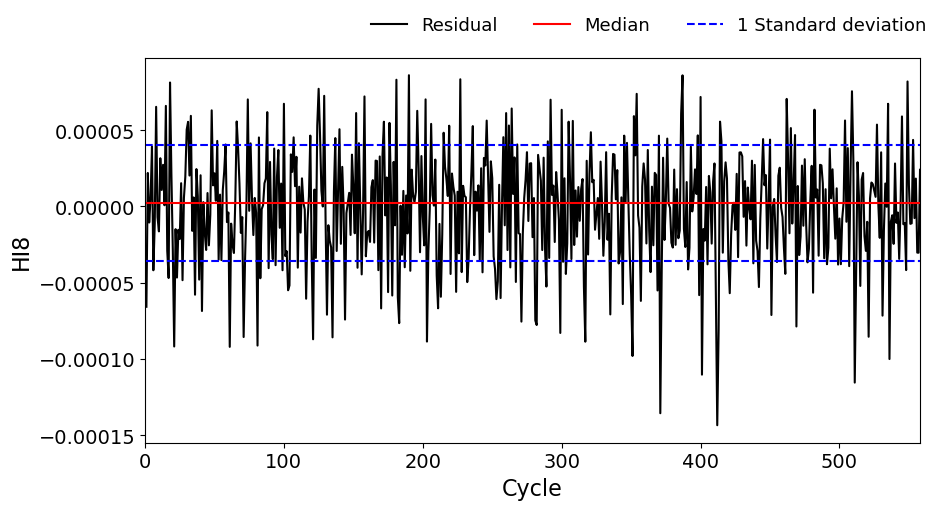

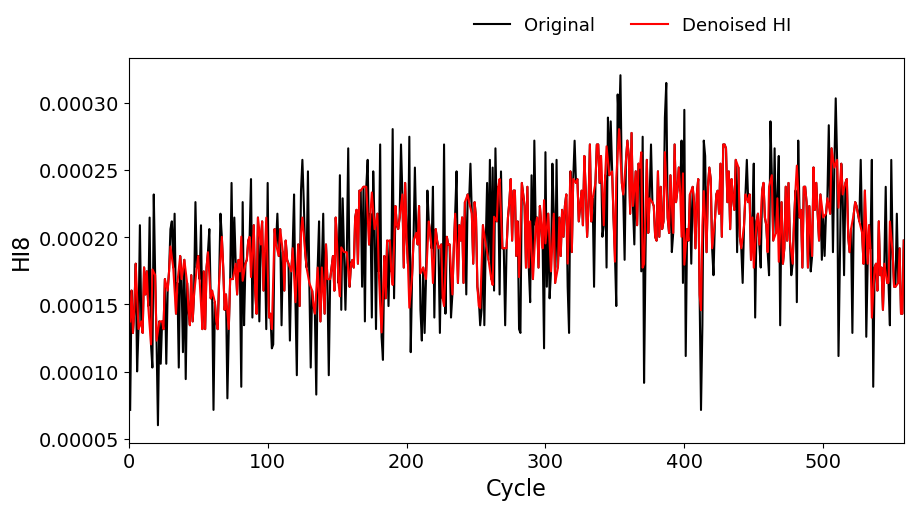

99
103
181
182
202
203
227
252
253
281
350
370
371
400
411
412
481
535
252


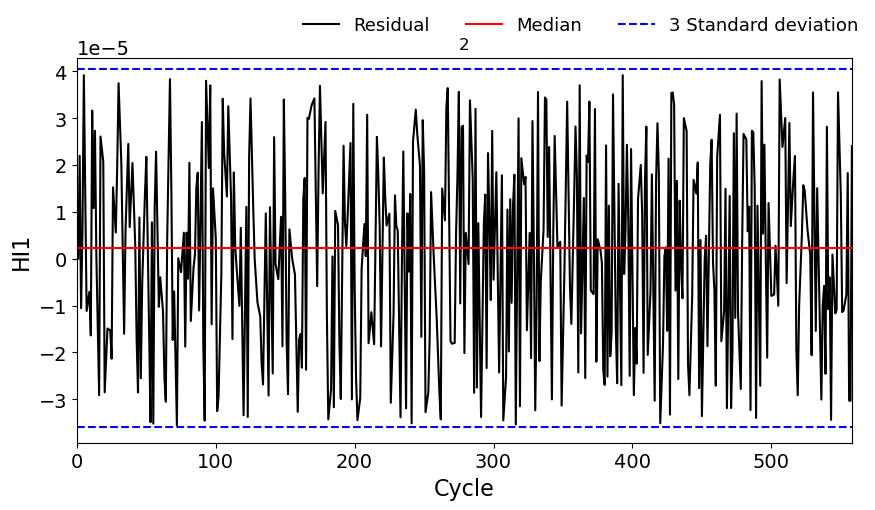

outlier
5
outlier
67
outlier
393
outlier
506


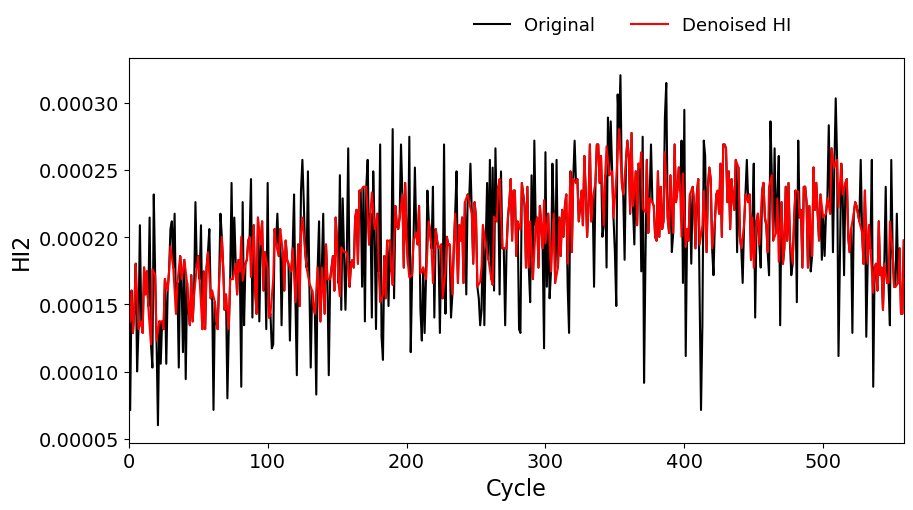

In [103]:
x= data['Cycle']
y= data.iloc[0:,9]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,9]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised
for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVES (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_CVES # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_CVES=y_denoised_current

(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            WLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     340.9
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           2.63e-97
Time:                        14:09:29   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0303      0.251      8.074      0.0

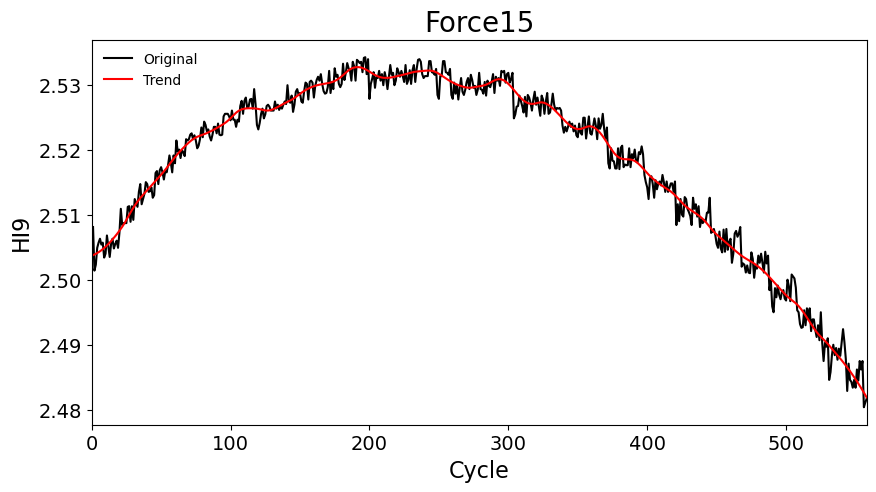

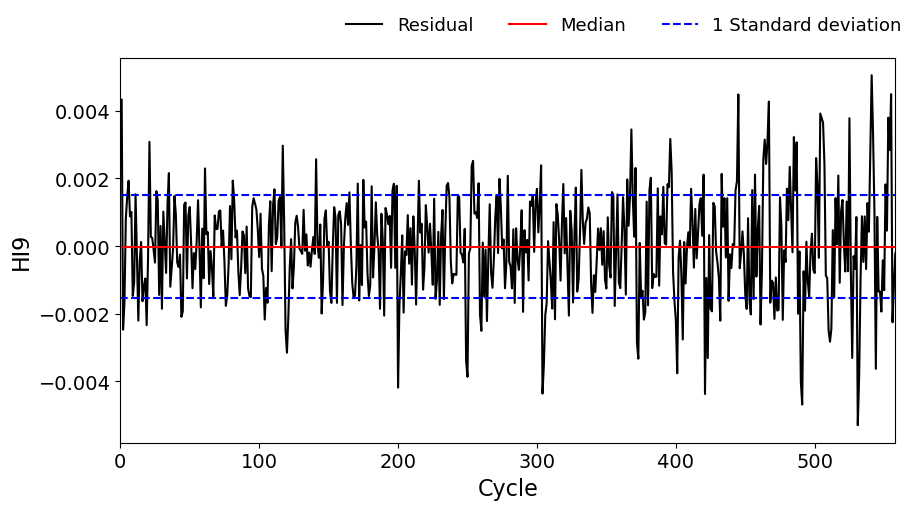

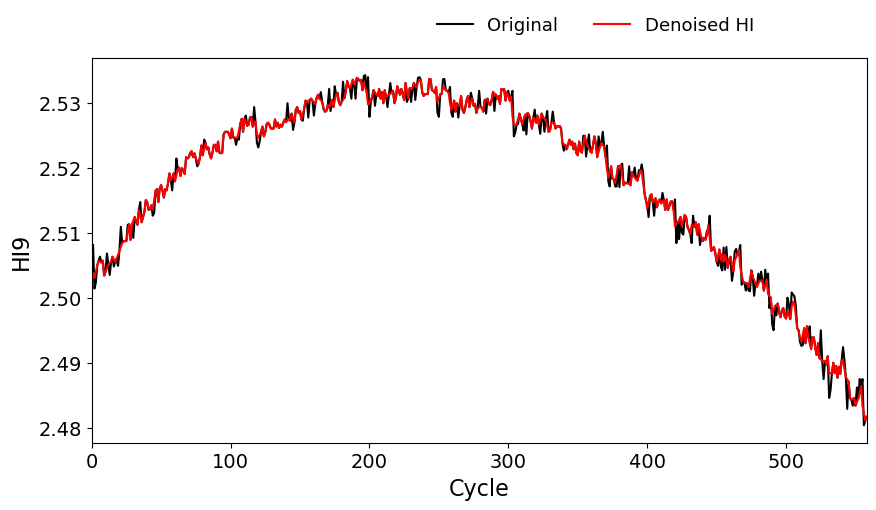

120
199
200
249
259
303
304
305
306
372
377
381
395
396
400
420
444
464
465
466
486
490
491
504
505
506
510
511
540
541
542
553
554
305
464
465
466
505
510
540
541
553
464
465


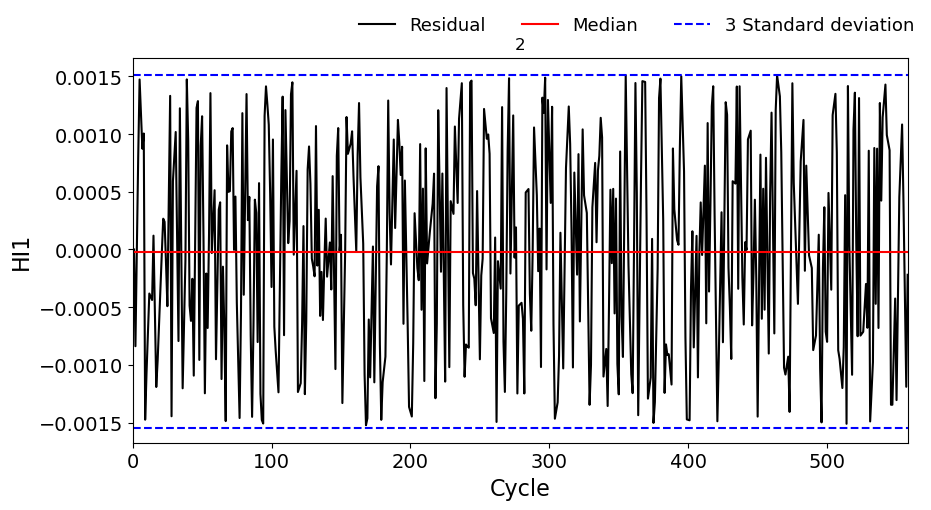

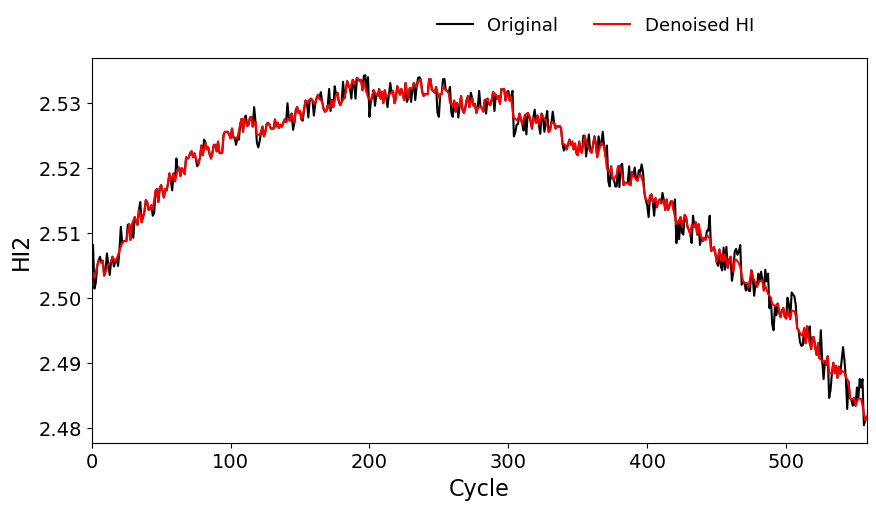

In [104]:
x= data['Cycle']
y= data['DIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['DIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def denoise(data, y_res,denoised):
    # data: denoise 된 데이터, 새로운 잔차,새롭게 denoise 넣을 리스트
    cycle=1
    for t in y_res:
        #t=y_res[cycle-1]
        if median+(-1)*std<=t<=median+1*std:
            denoised_val=data[cycle-1]
        else :
            print(cycle)
            if cycle==1:
                denoised_val=y_trend[0]
            elif cycle==len(y_res):
                denoised_val=denoised[-1]
            else :
                denoised_1=y_res[cycle]
                minus=denoised-y_trend[:len(denoised)]
                denoised_2=minus[-1]
                target=np.median([denoised_1,denoised_2])
                denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
        denoised.append(denoised_val)
        cycle +=1
    y_denoised=np.array(denoised)
    
    return y_denoised

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'DIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+target # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_DIV=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_DIV,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#####################################################
# 초기 조건 설정
y_denoised_current = y_denoised_DIV # 초기 denoised 데이터 설정
iterations = 500 # 반복할 횟수

# 결과를 저장할 리스트 초기화


for _ in range(iterations):
    
    denoised_step = [] # 현재 단계에서 denoised 데이터를 저장할 리스트
    y_res_current = y_denoised_current - y_trend # 현재 단계의 residuals 계산
    y_denoised_current = denoise(data=y_denoised_current, y_res=y_res_current, denoised=denoised_step)


plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_current-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.title('2')
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_5=y_denoised_current-y_trend
count=1
for t in y_res_5:
    if t>(1*std) or t<-(1*std):
        print("outlier")
        print(count)
    else:
        pass
    count+=1
    
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_current,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()
y_denoised_DIV=y_denoised_current

In [105]:
df = pd.DataFrame({'HI1': y_denoised_max, 'HI2': y_denoised_min, 'HI3': y_denoised_maxmin,
                  'HI4': y_denoised_civ, 'HI5': y_denoised_CCVIS, 'HI6': y_denoised_CCVES,
                  'HI7': y_denoised_CVIS, 'HI8': y_denoised_CVES, 'HI9': y_denoised_DIV})

print(df)

            HI1         HI2        HI3       HI4        HI5       HI6  \
0    1357.50000  1285.90000  70.940750  2.707436  11.036000  1.636308   
1    1357.70000  1285.90000  71.182004  2.700800  11.063115  1.658093   
2    1357.70000  1286.00000  71.233762  2.704800  11.052672  1.646987   
3    1357.80000  1286.50000  71.261988  2.706500  11.042000  1.636000   
4    1357.90000  1286.70000  71.290083  2.707100  11.020000  1.624000   
..          ...         ...        ...       ...        ...       ...   
553  1474.01238  1408.88011  68.016940  2.928400  10.875451  1.455972   
554  1474.37071  1409.21711  68.172180  2.929000  10.886963  1.468000   
555  1475.76866  1409.65740  68.258960  2.933392  10.900457  1.446000   
556  1476.11786  1409.38332  68.259723  2.937800  10.914000  1.444980   
557  1475.99312  1410.17343  68.259723  2.938000  10.908000  1.444000   

          HI7       HI8       HI9  
0    0.019814  0.000137  2.503777  
1    0.020410  0.000160  2.503032  
2    0.020210  

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(df)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_norm_denoised = pd.DataFrame(data_normalized, columns=df.columns)

# 정규화된 데이터 확인
data_norm_denoised.head()

HI1       HI2       HI3       HI4       HI5       HI6       HI7  \
0  0.019908  0.000000  0.461193  0.034085  0.956762  0.917143  0.865451   
1  0.021560  0.000000  0.499247  0.006284  1.000000  1.000000  1.000000   
2  0.021560  0.000805  0.507412  0.023041  0.983348  0.957761  0.954853   
3  0.022386  0.004828  0.511864  0.030163  0.966330  0.915972  0.769919   
4  0.023213  0.006437  0.516296  0.032677  0.931249  0.870331  0.801193   

        HI8       HI9  
0  0.106667  0.430295  
1  0.250095  0.416167  
2  0.053450  0.433771  
3  0.160356  0.451613  
4  0.374949  0.466793

In [108]:
data=pd.read_csv("./data_paper/Force15kgf.csv")

print(data.shape)

# data가 pandas DataFrame이고, shape이 (558, 13)이라고 가정합니다.

# 'cycle', 'soh', 'DVSOC50' 열을 제외하고 나머지 데이터만 유지
# 여기서 'cycle'이 2개 있다고 하셨으니, 구체적인 열 이름이 필요할 수 있습니다.
# 예를 들어, 'cycle1', 'cycle2' 같이 구분이 되어 있다면 아래와 같이 작성합니다.
data_reduced = data.drop(['Unnamed: 0', 'Cycle', 'SOH', 'DVSOC50'], axis=1)

# 결과 확인
print(data_reduced.shape)  # 이제 (558, 9)가 되어야 합니다.
data_reduced.head()

(558, 13)
(558, 9)


max.    min.  max.-min.     CIV   CCVIS  CCVES  CVIS (dt)  CVES (dt)  \
0  1357.5  1283.5   72.82119  2.4414  11.036  1.680    0.01614   0.000072   
1  1357.7  1285.9   72.41452  2.7008  11.118  1.590    0.02041   0.000160   
2  1357.7  1286.0   72.05853  2.7048  11.090  1.680    0.02021   0.000129   
3  1357.8  1286.5   71.75321  2.7065  11.042  1.636    0.01887   0.000146   
4  1357.9  1286.7   71.49856  2.7071  11.020  1.624    0.01857   0.000180   

      DIV  
0  2.5081  
1  2.5014  
2  2.5023  
3  2.5049  
4  2.5057

In [109]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(data_reduced)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_normalized = pd.DataFrame(data_normalized, columns=data_reduced.columns)

# 정규화된 데이터 확인
data_normalized.head()

max.      min.  max.-min.       CIV     CCVIS     CCVES  CVIS (dt)  \
0  0.023061  0.008609   0.757808  0.000000  0.881159  1.000000   0.346095   
1  0.024708  0.027392   0.693661  0.448014  1.000000  0.720497   1.000000   
2  0.024708  0.028175   0.637508  0.454922  0.959420  1.000000   0.969372   
3  0.025532  0.032088   0.589348  0.457858  0.889855  0.863354   0.764165   
4  0.026355  0.033653   0.549180  0.458895  0.857971  0.826087   0.718224   

   CVES (dt)       DIV  
0   0.043789  0.514870  
1   0.384692  0.390335  
2   0.263696  0.407063  
3   0.329476  0.455390  
4   0.461515  0.470260

In [110]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import os
import random


def build_autoencoder(input_dim, encoding_dim):
    # 입력 레이어
    input_layer = Input(shape=(input_dim,))
    
    # 인코더 레이어: 입력을 encoding_dim 차원으로 압축, He 초기화 사용
    encoded = Dense(encoding_dim[0], activation='elu')(input_layer)
    encoded = Dense(encoding_dim[1], activation='elu')(encoded)
    
    # 디코더 레이어: encoding_dim 차원을 다시 입력 차원으로 복원, He 초기화 사용
    decoded = Dense(encoding_dim[0], activation='elu')(encoded)
    decoded = Dense(input_dim, activation='elu')(decoded)
    
    # 오토인코더 모델 생성
    autoencoder = Model(input_layer, decoded)
    
    # 인코더 모델 생성
    encoder = Model(input_layer, encoded)
    
    # 디코더 모델 생성
    encoded_input = Input(shape=(encoding_dim[1],))
    decoder_layer1 = autoencoder.layers[-2](encoded_input)
    decoder_layer2 = autoencoder.layers[-1](decoder_layer1)
    decoder = Model(encoded_input, decoder_layer2)
    
    return autoencoder, encoder, decoder

# 모델 구축
input_dim = 9  # 입력 차원
encoding_dim = [6, 4]  # 인코더의 두 레이어에서의 차원
autoencoder, encoder, decoder = build_autoencoder(input_dim, encoding_dim)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 63        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [111]:
# data.shape는 (558, 9)입니다.

# 첫 277개 행을 훈련 데이터로 사용
X_train = data_norm_denoised
X_test=data_norm_denoised

# 모델 훈련
autoencoder.fit(X_train, X_train, epochs=400, batch_size=32,validation_data=(X_train,X_train))

# 테스트 데이터에 대한 재구성
reconstructed = autoencoder.predict(X_test)




Train on 558 samples, validate on 558 samples
Epoch 1/400
558/558 [==============================] - 0s 506us/sample - loss: 0.4831 - val_loss: 0.3906
Epoch 2/400
558/558 [==============================] - 0s 150us/sample - loss: 0.3220 - val_loss: 0.2484
Epoch 3/400
558/558 [==============================] - 0s 95us/sample - loss: 0.2009 - val_loss: 0.1549
Epoch 4/400
558/558 [==============================] - 0s 81us/sample - loss: 0.1300 - val_loss: 0.1069
Epoch 5/400
558/558 [==============================] - 0s 75us/sample - loss: 0.0944 - val_loss: 0.0825
Epoch 6/400
558/558 [==============================] - 0s 86us/sample - loss: 0.0760 - val_loss: 0.0698
Epoch 7/400
558/558 [==============================] - 0s 74us/sample - loss: 0.0663 - val_loss: 0.0628
Epoch 8/400
558/558 [==============================] - 0s 74us/sample - loss: 0.0608 - val_loss: 0.0589
Epoch 9/400
558/558 [==============================] - 0s 74us/sample - loss: 0.0578 - val_loss: 0.0565
Epoch 10/400
558

558/558 [==============================] - 0s 68us/sample - loss: 0.0051 - val_loss: 0.0050
Epoch 79/400
558/558 [==============================] - 0s 69us/sample - loss: 0.0050 - val_loss: 0.0049
Epoch 80/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0049 - val_loss: 0.0048
Epoch 81/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0048 - val_loss: 0.0048
Epoch 82/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0047 - val_loss: 0.0047
Epoch 83/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0047 - val_loss: 0.0046
Epoch 84/400
558/558 [==============================] - 0s 69us/sample - loss: 0.0046 - val_loss: 0.0046
Epoch 85/400
558/558 [==============================] - 0s 68us/sample - loss: 0.0045 - val_loss: 0.0045
Epoch 86/400
558/558 [==============================] - 0s 69us/sample - loss: 0.0045 - val_loss: 0.0045
Epoch 87/400
558/558 [==============================] - 0s 67us/samp

558/558 [==============================] - 0s 71us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 156/400
558/558 [==============================] - 0s 66us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 157/400
558/558 [==============================] - 0s 60us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 158/400
558/558 [==============================] - 0s 96us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 159/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 160/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 161/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 162/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 163/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 164/400
558/558 [==============================] - 0s 

558/558 [==============================] - 0s 72us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 233/400
558/558 [==============================] - 0s 66us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 234/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 235/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 236/400
558/558 [==============================] - 0s 72us/sample - loss: 0.0019 - val_loss: 0.0018
Epoch 237/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0018 - val_loss: 0.0018
Epoch 238/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0018 - val_loss: 0.0018
Epoch 239/400
558/558 [==============================] - 0s 68us/sample - loss: 0.0018 - val_loss: 0.0018
Epoch 240/400
558/558 [==============================] - 0s 65us/sample - loss: 0.0018 - val_loss: 0.0018
Epoch 241/400
558/558 [==============================] - 0s 

558/558 [==============================] - 0s 70us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 310/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 311/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 312/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 313/400
558/558 [==============================] - 0s 77us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 314/400
558/558 [==============================] - 0s 71us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 315/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 316/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 317/400
558/558 [==============================] - 0s 70us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 318/400
558/558 [==============================] - 0s 

558/558 [==============================] - 0s 67us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 387/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 388/400
558/558 [==============================] - 0s 68us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 389/400
558/558 [==============================] - 0s 65us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 390/400
558/558 [==============================] - 0s 65us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 391/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 392/400
558/558 [==============================] - 0s 66us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 393/400
558/558 [==============================] - 0s 69us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 394/400
558/558 [==============================] - 0s 67us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 395/400
558/558 [==============================] - 0s 

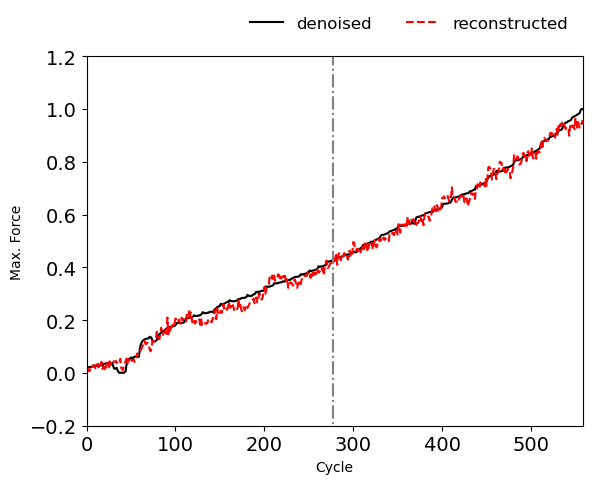

In [112]:

y= reconstructed[:,0]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI1']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

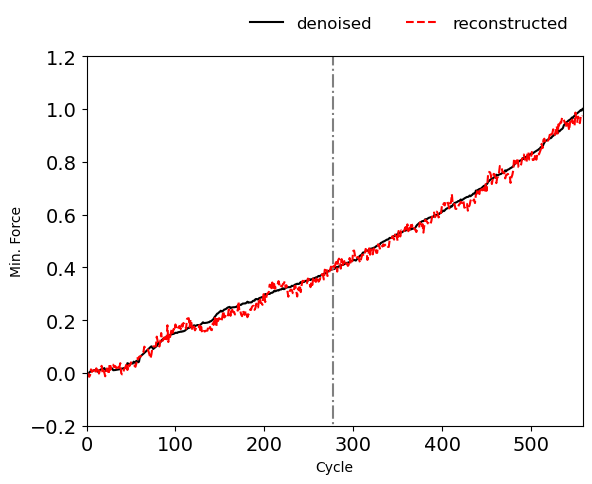

In [113]:
y= reconstructed[:,1]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI2']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

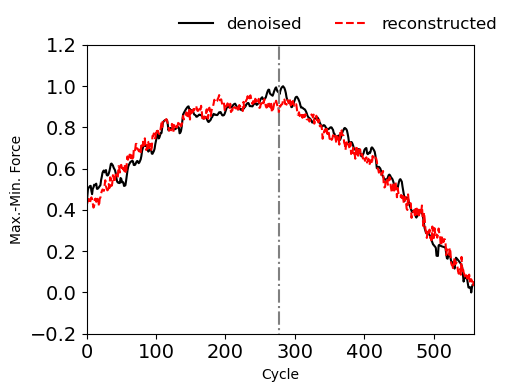

In [114]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,2]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI3']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max.-Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

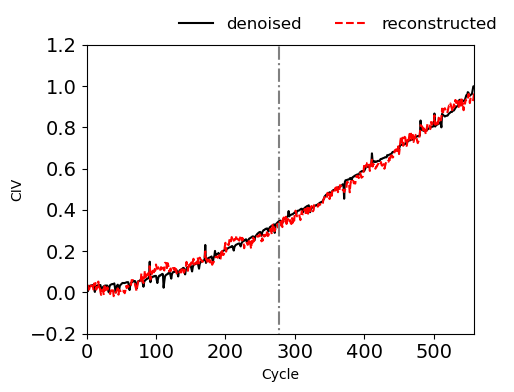

In [115]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,3]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI4']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("CIV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

<Figure size 500x375 with 0 Axes>

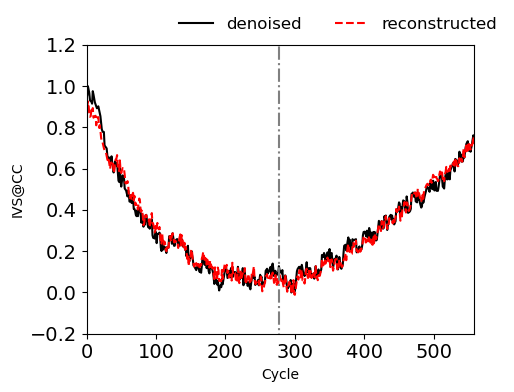

In [116]:
plt.figure(figsize=(5,3.75))
plt.figure(figsize=(5,3.75))
y= reconstructed[:,4]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI5']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("IVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

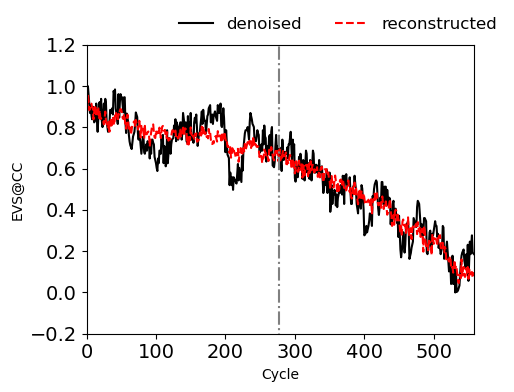

In [117]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,5]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI6']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("EVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

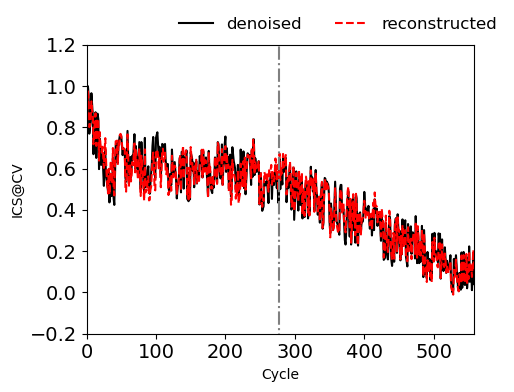

In [118]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,6]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI7']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ICS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

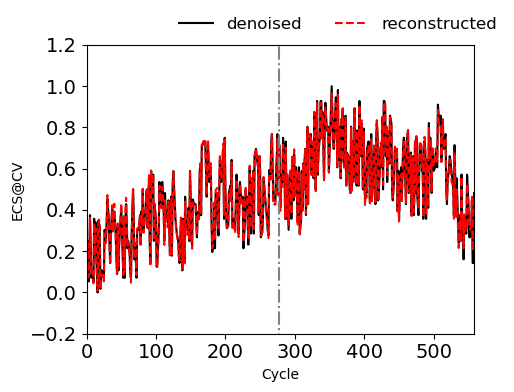

In [119]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,7]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI8']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ECS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

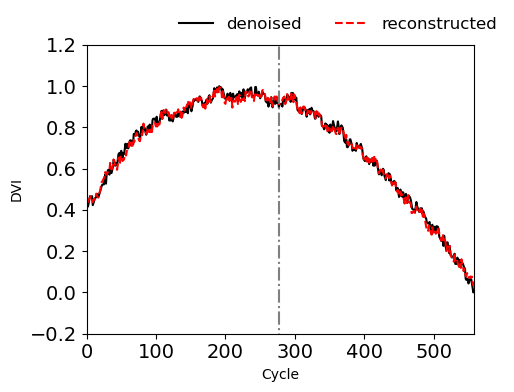

In [120]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,8]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI9']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("DVI")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

In [121]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

x=reconstructed
y=data['SOH']*100

x_train=x[:295,:]
y_train=y[:295]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_pred, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_pred))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 1.1673272843273867


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [122]:
x=reconstructed[:,:3]
y=data['SOH']*100

x_train=x[:295,:]
y_train=y[:295]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_mechanical, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_mechanical))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 0.6656889922610497


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [123]:
x=reconstructed[:,3:]
y=data['SOH']*100

x_train=x[:295,:]
y_train=y[:295]
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_Impedance, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_Impedance))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 2.020030319712323


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


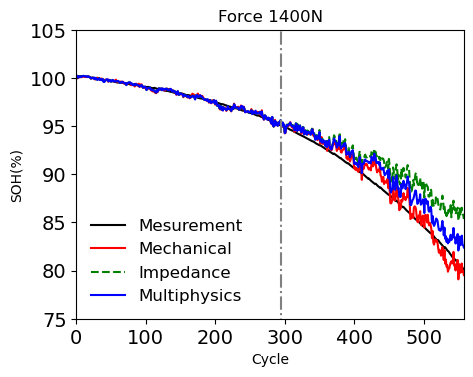

In [124]:
plt.figure(figsize=(5,3.75))
y_2= y_mechanical
y_4=y_pred
y_3=y_Impedance
x= np.arange(1, len(y) + 1)
y_soh=data['SOH']*100
plt.plot(x,y_soh,'k-',label='Mesurement')
plt.plot(x,y_2,'r-',label='Mechanical')
plt.plot(x,y_3,'g--',label='Impedance')
plt.plot(x,y_4,'b-',label='Multiphysics')

plt.title("Force 1400N")
plt.xlabel("Cycle")
plt.ylabel("SOH(%)")
plt.xlim([0,len(x)])
plt.ylim(75,105)
plt.axvline(295,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='lower left',frameon=False,fontsize=12)
plt.show()

